In [32]:
import pandas as pd

df = pd.read_csv("Finance_data.csv")
print(df.head())
print(df.info())



   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

Male      25
Female    15
Name: gender, dtype: int64


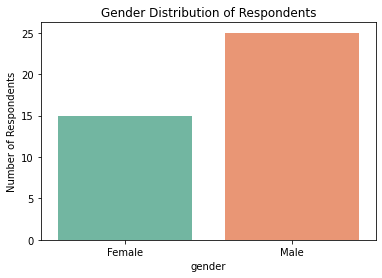

In [35]:
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Gender Distribution of Respondents')
plt.ylabel('Number of Respondents')
plt.savefig('Gender Disribution of Respondents')
plt.show()

In [36]:
# Example age ranges
bins = [0, 25, 35, 45, 60, 100]        # Upper bounds for each group
labels = ['18-25','26-35','36-45','46-60','60+']

df['AGE_GROUP'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


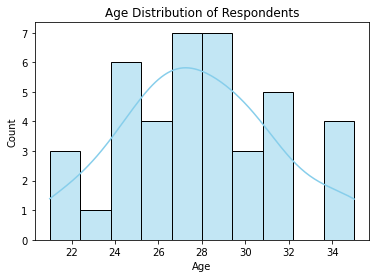

In [37]:
# Histogram
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('Age Distribution of Respondents')
plt.show()

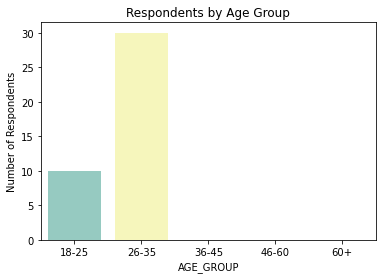

In [38]:
sns.countplot(data=df, x='AGE_GROUP', palette='Set3', order=["18-25","26-35","36-45","46-60","60+"])
plt.title('Respondents by Age Group')
plt.ylabel('Number of Respondents')
plt.savefig('Respondents by Age Group')
plt.show()


gender     Female  Male
AGE_GROUP              
18-25           6     4
26-35           9    21


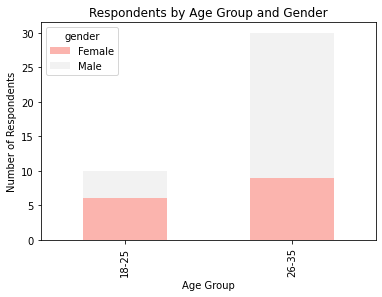

In [39]:
age_gender_crosstab = pd.crosstab(df['AGE_GROUP'], df['gender'])
print(age_gender_crosstab)

# Stacked bar chart
age_gender_crosstab.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Respondents by Age Group and Gender')
plt.ylabel('Number of Respondents')
plt.xlabel('Age Group')
plt.savefig('Respondents by Age Group and Gender')
plt.show()

In [40]:
gender_percent = df['gender'].value_counts(normalize=True) * 100
print(gender_percent)


Male      62.5
Female    37.5
Name: gender, dtype: float64


In [41]:
avg_age_gender = df.groupby('gender')['age'].mean()
print(avg_age_gender)


gender
Female    27.733333
Male      27.840000
Name: age, dtype: float64


Yes    37
No      3
Name: Investment_Avenues, dtype: int64


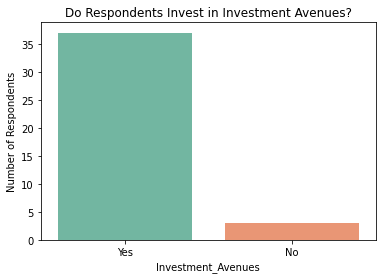

In [42]:
# Count of Yes/No
invest_counts = df['Investment_Avenues'].value_counts()
print(invest_counts)

# Bar chart
sns.countplot(data=df, x='Investment_Avenues', palette='Set2')
plt.title('Do Respondents Invest in Investment Avenues?')
plt.ylabel('Number of Respondents')
plt.show()



Yes    35
No      5
Name: Stock_Marktet, dtype: int64


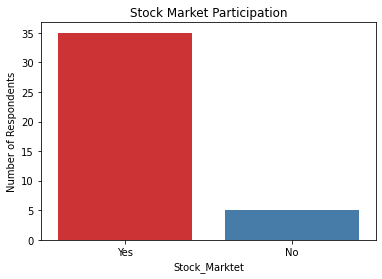

In [43]:
stock_counts = df['Stock_Marktet'].value_counts()
print(stock_counts)

sns.countplot(data=df, x='Stock_Marktet', palette='Set1')
plt.title('Stock Market Participation')
plt.ylabel('Number of Respondents')
plt.show()


Investment_Avenues  No  Yes
gender                     
Female               3   12
Male                 0   25


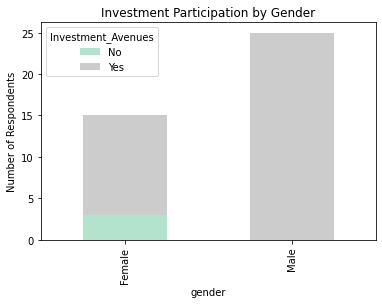

In [44]:
invest_gender = pd.crosstab(df['gender'], df['Investment_Avenues'])
print(invest_gender)

invest_gender.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Investment Participation by Gender')
plt.ylabel('Number of Respondents')
plt.show()


Investment_Avenues  No  Yes
AGE_GROUP                  
18-25                3    7
26-35                0   30


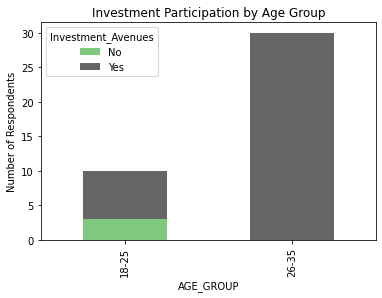

In [45]:
invest_age = pd.crosstab(df['AGE_GROUP'], df['Investment_Avenues'])
print(invest_age)

invest_age.plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Investment Participation by Age Group')
plt.ylabel('Number of Respondents')
plt.show()


PPF                 2.025
Mutual_Funds        2.550
Equity_Market       3.475
Fixed_Deposits      3.575
Government_Bonds    4.650
Debentures          5.750
Gold                5.975
dtype: float64


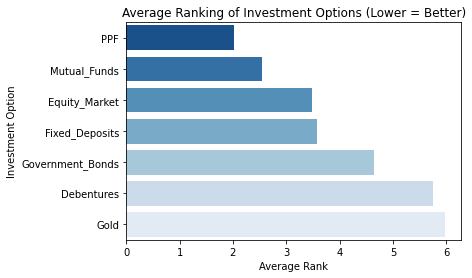

In [46]:
ranking_cols = [
    'Mutual_Funds','Equity_Market','Debentures','Government_Bonds','Fixed_Deposits','PPF','Gold']
# Calculate mean ranking for each option
avg_ranks = df[ranking_cols].mean().sort_values()
print(avg_ranks)

# Bar chart
sns.barplot(x=avg_ranks.values, y=avg_ranks.index, palette="Blues_r")
plt.title("Average Ranking of Investment Options (Lower = Better)")
plt.xlabel("Average Rank")
plt.ylabel("Investment Option")
plt.show()


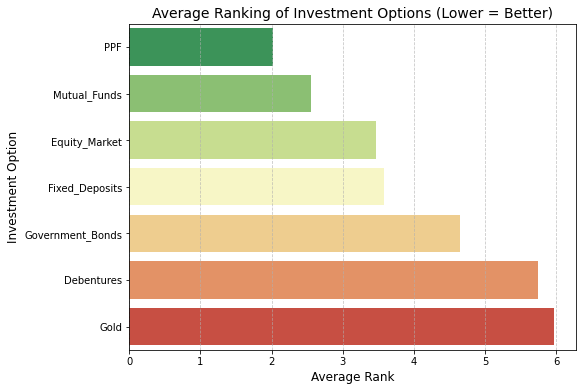

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(y=avg_ranks.index, x=avg_ranks.values, palette="RdYlGn_r")  
plt.title("Average Ranking of Investment Options (Lower = Better)", fontsize=14)
plt.xlabel("Average Rank", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


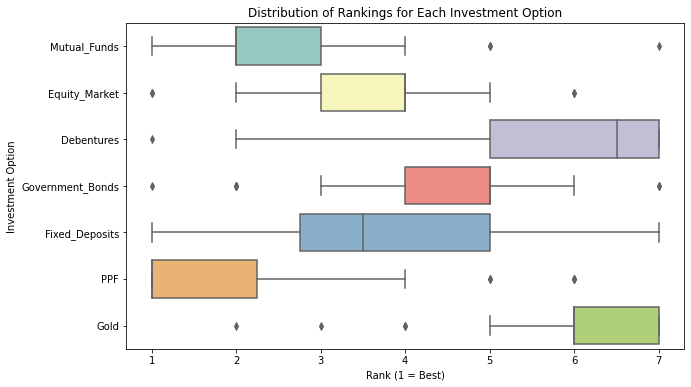

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[ranking_cols], orient="h", palette="Set3")
plt.title("Distribution of Rankings for Each Investment Option")
plt.xlabel("Rank (1 = Best)")
plt.ylabel("Investment Option")
plt.show()


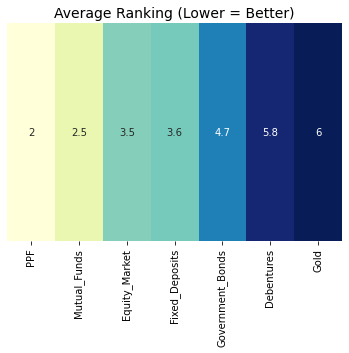

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(avg_ranks.to_frame().T, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Average Ranking (Lower = Better)", fontsize=14)
plt.yticks([])
plt.show()


PPF                 24
Fixed_Deposits       8
Mutual_Funds         4
Equity_Market        2
Government_Bonds     1
Debentures           1
Name: Top_Choice, dtype: int64


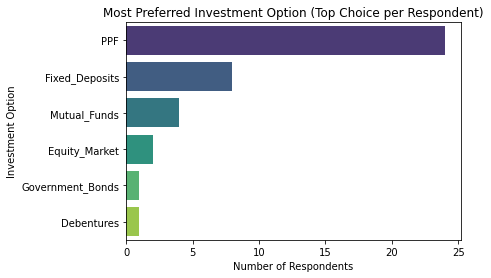

In [51]:
# Find the option with the lowest rank for each respondent
df['Top_Choice'] = df[ranking_cols].idxmin(axis=1)

top_choice_counts = df['Top_Choice'].value_counts()
print(top_choice_counts)

# Plot
sns.countplot(y='Top_Choice', data=df, order=top_choice_counts.index, palette="viridis")
plt.title("Most Preferred Investment Option (Top Choice per Respondent)")
plt.xlabel("Number of Respondents")
plt.ylabel("Investment Option")
plt.show()
#Insight: Which investment avenue is the #1 choice for most people?

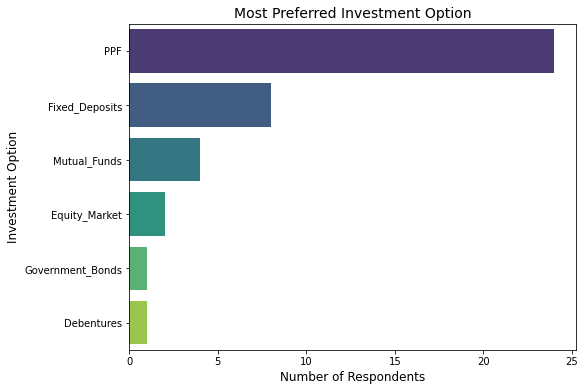

In [ ]:
top_choice_counts = df['Top_Choice'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")
plt.title("Most Preferred Investment Option", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.show()
#A majority of respondents (over 60%) selected Public Provident Fund (PPF) as their most preferred investment avenue, indicating a strong bias toward secure, government-backed investments. In contrast, riskier options like Equity Markets and Debentures were rarely the top choice."

Top_Choice  Debentures  Equity_Market  Fixed_Deposits  Government_Bonds  \
gender                                                                    
Female               0              1               1                 1   
Male                 1              1               7                 0   

Top_Choice  Mutual_Funds  PPF  
gender                         
Female                 2   10  
Male                   2   14  


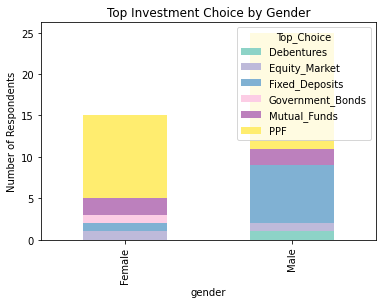

In [53]:
choice_gender = pd.crosstab(df['gender'], df['Top_Choice'])
print(choice_gender)

choice_gender.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Top Investment Choice by Gender")
plt.ylabel("Number of Respondents")
plt.show()


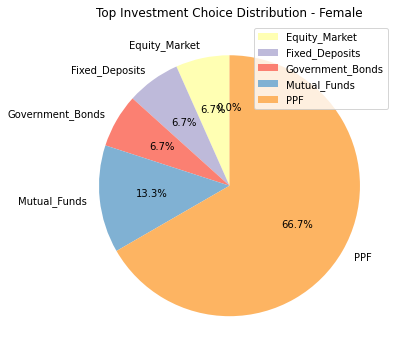

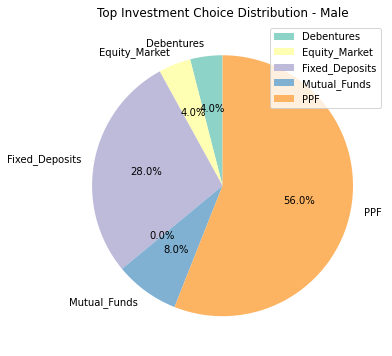

In [56]:
import matplotlib.pyplot as plt

# Group counts by Gender and Top Choice
choice_gender = df.groupby(['gender', 'Top_Choice']).size().unstack(fill_value=0)

# Create pie chart per gender
for gender in choice_gender.index:
    plt.figure(figsize=(6,6))
    choice_gender.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set3")
    )
    plt.title(f"Top Investment Choice Distribution - {gender}")
    plt.ylabel("")  # remove y-axis label
    plt.legend()
    plt.show()


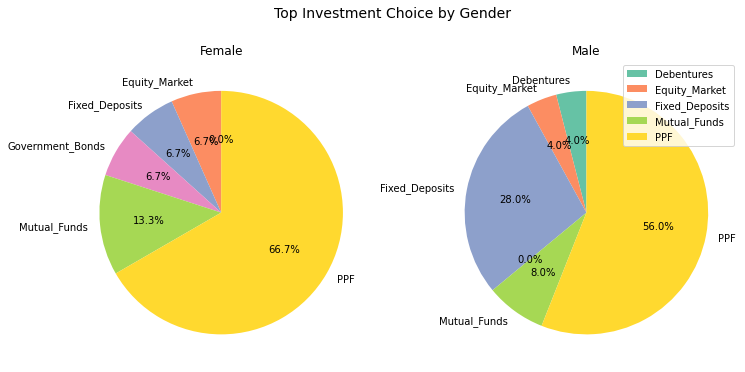

In [58]:
fig, axes = plt.subplots(1, len(choice_gender.index), figsize=(12,6))

for i, gender in enumerate(choice_gender.index):
    choice_gender.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        ax=axes[i],
        colors=sns.color_palette("Set2")
    )
    axes[i].set_title(f"{gender}")
    axes[i].set_ylabel("")
plt.legend()
plt.suptitle("Top Investment Choice by Gender", fontsize=14)
plt.show()


Top_Choice  Debentures  Equity_Market  Fixed_Deposits  Government_Bonds  \
AGE_GROUP                                                                 
18-25                0              2               1                 1   
26-35                1              0               7                 0   

Top_Choice  Mutual_Funds  PPF  
AGE_GROUP                      
18-25                  1    5  
26-35                  3   19  


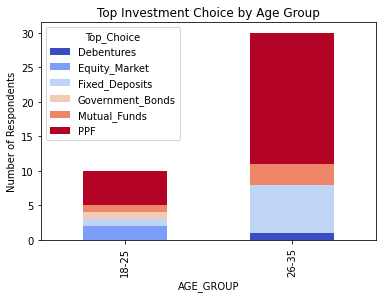

In [59]:
choice_age = pd.crosstab(df['AGE_GROUP'], df['Top_Choice'])
print(choice_age)

choice_age.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Top Investment Choice by Age Group")
plt.ylabel("Number of Respondents")
plt.show()


In [61]:
# Count frequency of top choices
top_choice_counts = df['Top_Choice'].value_counts().nlargest(3)
print(top_choice_counts)


PPF               24
Fixed_Deposits     8
Mutual_Funds       4
Name: Top_Choice, dtype: int64


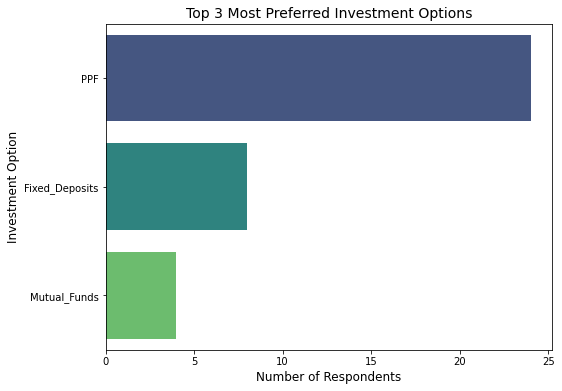

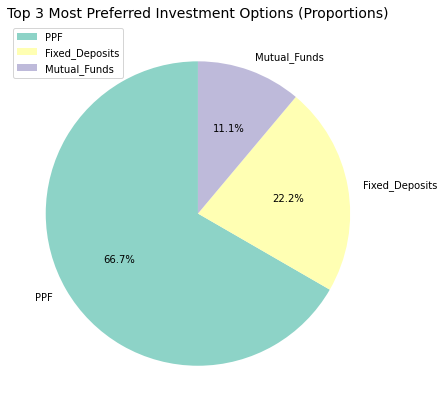

Top_Choice  Fixed_Deposits  Mutual_Funds  PPF
gender                                       
Female                   1             2   10
Male                     7             2   14


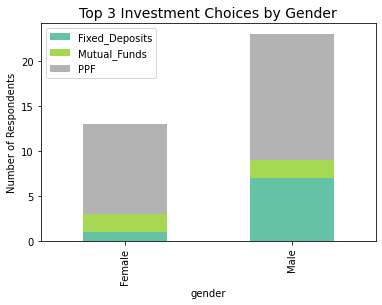

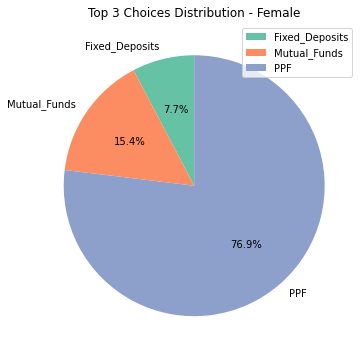

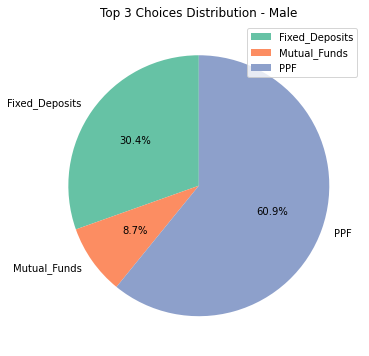

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_choice_counts.index, x=top_choice_counts.values, palette="viridis")
plt.title("Top 3 Most Preferred Investment Options", fontsize=14)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Investment Option", fontsize=12)
plt.show()


plt.figure(figsize=(7,7))
top_choice_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title("Top 3 Most Preferred Investment Options (Proportions)", fontsize=14)
plt.legend()
plt.ylabel("")
plt.show()



# Filter only rows where Top_Choice is in the top 3
df_top3 = df[df['Top_Choice'].isin(top_choice_counts.index)]

choice_gender_top3 = pd.crosstab(df_top3['gender'], df_top3['Top_Choice'])
print(choice_gender_top3)

# Bar chart (stacked)
choice_gender_top3.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Top 3 Investment Choices by Gender", fontsize=14)
plt.ylabel("Number of Respondents")
plt.legend()
plt.show()


for gender in choice_gender_top3.index:
    plt.figure(figsize=(6,6))
    choice_gender_top3.loc[gender].plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2")
    )
    plt.title(f"Top 3 Choices Distribution - {gender}")
    plt.ylabel("")
    plt.legend()
    plt.show()
